<a href="https://colab.research.google.com/github/RoniAguilar/Tareas_EstadisticaAplicada_17/blob/main/VVAO_1855188_EstadisticaAplicadaG51_parcial2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARCIAL 2 - ejercicio 2

**Estadística Aplicada**

**Nombre: Verónica Vanessa Aguilar Ortiz**

**Matricula: 1855188**

**Grupo: 051**

**a) Importa las librerías que consideres necesarias (recuerda predefinir el 
tamaño de las gráficas)**

In [ ]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7.5]

**b) Sube los datos a github y luego impórtalos a tu notebook con el formato 
mensual**


In [ ]:
serie = pd.read_csv('https://raw.githubusercontent.com/RoniAguilar/Tareas_EstadisticaAplicada_17/main/IGAE.csv?token=GHSAT0AAAAAABSPEYJVFBVOE6CZYFGGEF6GYSBIBPQ' ,index_col='Periodo',parse_dates=True)

In [ ]:
serie.dropna(inplace=True)

In [ ]:
serie.head()

,IGAE (base 2013)
Periodo,
1993-01-01,60.41
1993-02-01,61.02
1993-03-01,63.94
1993-04-01,61.87
1993-05-01,63.61


**c) Grafica la serie de tiempo (dale un formato adecuado a la gráfica 
personalizando títulos, color, etc)**

In [ ]:
serie.rename(columns = {'IGAE (base 2013)':'IGAE'}, inplace=True)

In [ ]:
serie.head()

,IGAE
Periodo,
1993-01-01,60.41
1993-02-01,61.02
1993-03-01,63.94
1993-04-01,61.87
1993-05-01,63.61


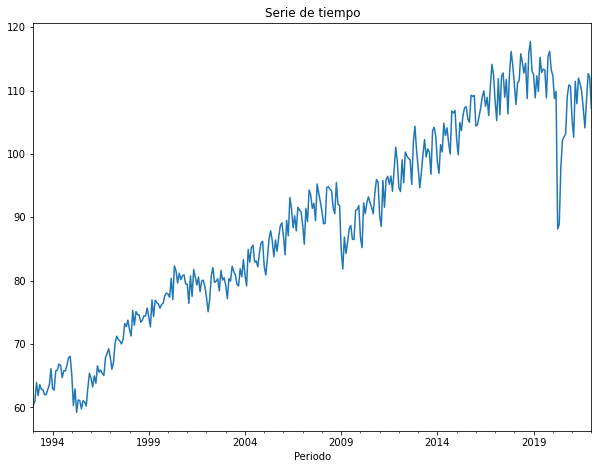

In [ ]:
serie.IGAE.plot()
plt.title('Serie de tiempo')
plt.show()

**d) Comenta que notas en el comportamiento de la serie la serie, ¿es 
estacionaria, notas algún patrón estacional?**

R: Tiene un comportamiento alcista y no es estacionaria.

In [ ]:
#hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(serie['IGAE'])

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.760955


In [ ]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, ERIE ESTACIONARIA') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, SERIE NO ESTACIONARIA ') 

con un un p-value = 0.761
 NO se rechaza hipótesis nula, SERIE NO ESTACIONARIA 


Nuestra serie no es estacionaria y para hacerla una serie estacionaria, usamos la función shift de pandas 
y guardamos la serie diferenciada en un objeto aparte.

**e) Del análisis ETS (parcial anterior) utilízalo para obtener la serie 
desestacionalizada del IGAE**

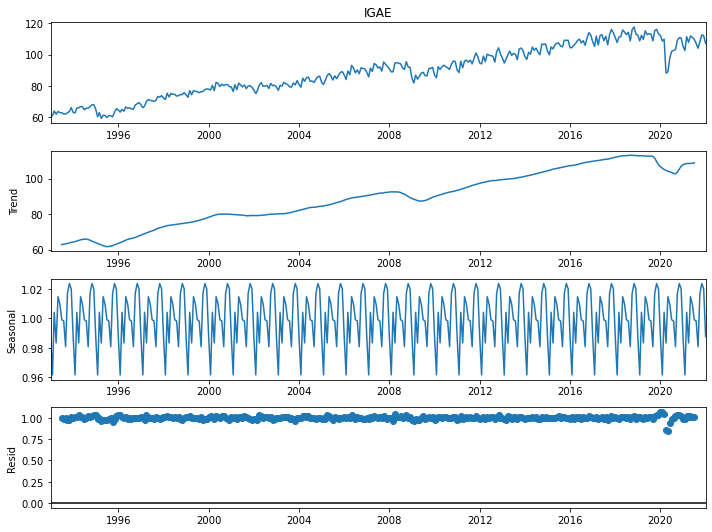

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(serie['IGAE'], model='multiplicative')  #mul tambien funciona
result.plot();

In [ ]:
#vamos a obtner la serie desestacionalida
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
serie['desestacionalizado'] = serie['IGAE'] / componente_estacional

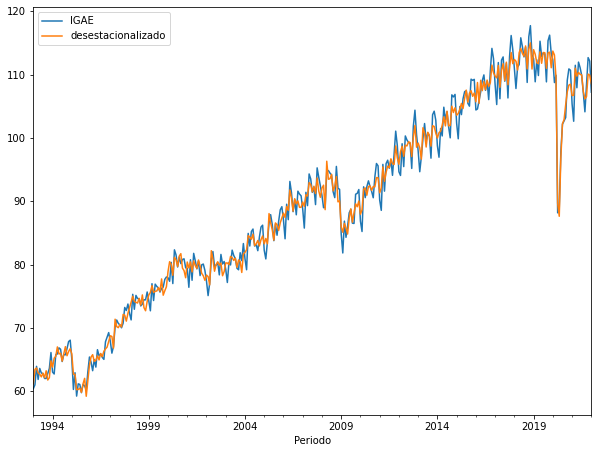

In [ ]:
#graficamos
serie[['IGAE','desestacionalizado']].plot(figsize=(10,7.5));

In [ ]:
serie_diff = serie['IGAE'] - serie['IGAE'].shift()

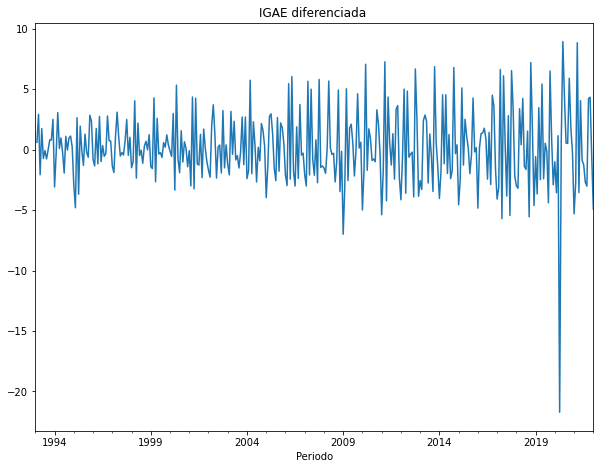

In [ ]:
#graficamos el tipo de cambio diferenciado
serie_diff.plot()
plt.title('IGAE diferenciada ')
plt.show()

In [ ]:
serie_diff = serie_diff.dropna()

In [ ]:
adf1 = adfuller(serie_diff)
if adf1[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, SERIE ESTACIONARIA') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, SERIE NO ESTACIONARIA ') 

con un un p-value=1.1218760082644084e-05
 Se rechaza hipótesis nula, SERIE ESTACIONARIA


**f) A partir de este momento solo trabajaremos con la serie 
desestacionalizada del IGAE**

**g) Obtén el grado de integración de la serie**

R: El grado de integración de la serie es 1 ya que somanemte diferenciamos una vez la serie para volverla estacionaria.



**h) Obtén cual es el posible orden (p,q) de la serie con base en ACF PACF**

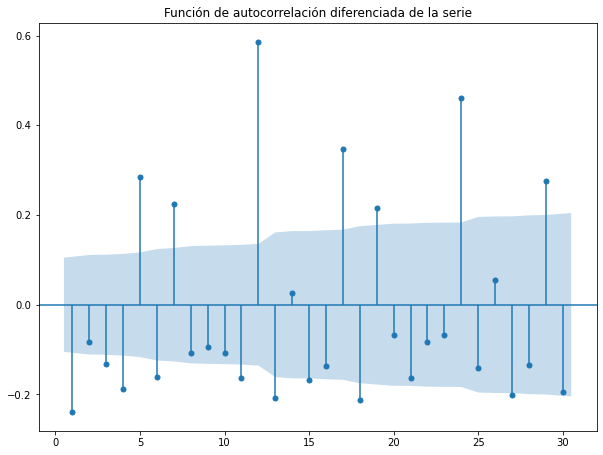

In [ ]:
#Grafica de autocorrelación ACF
plot_acf(serie_diff, zero=False, lags=30)
plt.title('Función de autocorrelación diferenciada de la serie')
plt.show()

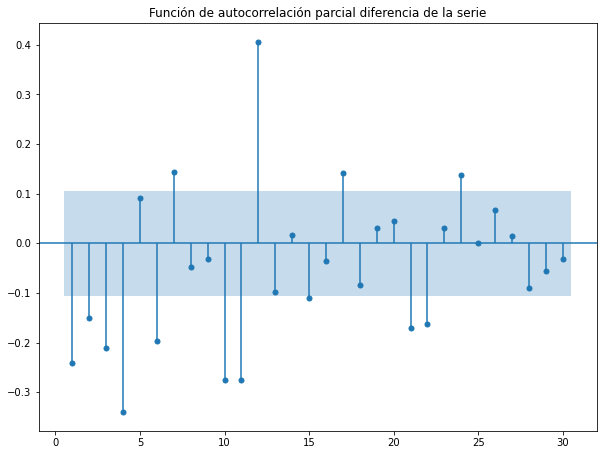

In [ ]:
#grafica de autocorrelación parcial PACF
plot_pacf(serie_diff, zero=False, lags=30)
plt.title('Función de autocorrelación parcial diferencia de la serie')
plt.show()

**i) Estima varios modelos ARIMA (los que consideres pertinentes) y elige el 
que tiene mejor AIC y mejor BIC.**


In [ ]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(serie_diff, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 0, MA: 3
AR: 0, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 0, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 0, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 1, MA: 3
AR: 1, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 1, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 1, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 2, MA: 0
AR: 2, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 2, MA: 2
AR: 2, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 2, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 2, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 2, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 3, MA: 0
AR: 3, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 3, MA: 2
AR: 3, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

AR: 3, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 3, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

AR: 3, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 4, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

AR: 4, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 4, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 4, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 5, MA: 0
AR: 5, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 5, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

AR: 5, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 5, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 5, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 5, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

AR: 6, MA: 0
AR: 6, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 6, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

AR: 6, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 6, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 6, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AR: 6, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   1770.976868  1778.681273
   1   1736.727177  1748.283785
   2   1715.625756  1731.034565
   3   1708.248616  1727.509628
   4   1710.064489  1733.177704
   5   1690.033394  1716.998811
   6   1684.286135  1715.103755
1  0   1752.263656  1763.820264
   1   1710.838102  1726.246912
   2   1712.632567  1731.893580
   3   1715.111613  1738.224828
   4   1696.389768  1723.355185
   5   1686.808119  1717.625739
   6   1683.785407  1718.455229
2  0   1746.253006  1761.661816
   1   1712.525603  1731.786616
   2   1709.460500  1732.573715
   3   1711.197764  1738.163181
   4   1687.521158  1718.338778
   5   1686.641805  1721.311627
   6   1684.572791  1723.094816
3  0   1732.894993  1752.156006
   1   1710.208198  1733.321413
   2   1710.754449  1737.719866
   3   1652.895272  1683.712892
   4   1682.412911  1717.082734
   5   1660.980243  1699.502268
   6   1661.931507  1704.305734
4  0   1693.078873  1716.192088
   1   1680.273107  1707.238524
   2   1681.158207  1711.975827
   3   1624.176003  1658.845825
   4   1617.498033  1656.020057
   5   1631.257736  1673.631964
   6   1578.218814  1624.445244
5  0   1692.046406  1719.011823
   1   1681.917648  1712.735268
   2   1674.201370  1708.871193
   3   1647.473729  1685.995754
   4   1628.246188  1670.620415
   5   1603.168198  1649.394628
   6   1590.886219  1640.964851
6  0   1681.315853  1712.133473
   1   1676.641041  1711.310864
   2   1676.213871  1714.735896
   3   1632.281032  1674.655259
   4   1589.751555  1635.977985
   5   1629.010582  1679.089214
   6   1599.575045  1653.505880

**Criterio bayesiano de información (BIC)**

In [ ]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
4  6   1578.218814  1624.445244
6  4   1589.751555  1635.977985
5  6   1590.886219  1640.964851
   5   1603.168198  1649.394628
6  6   1599.575045  1653.505880
4  4   1617.498033  1656.020057
   3   1624.176003  1658.845825
5  4   1628.246188  1670.620415
4  5   1631.257736  1673.631964
6  3   1632.281032  1674.655259
   5   1629.010582  1679.089214
3  3   1652.895272  1683.712892
5  3   1647.473729  1685.995754
3  5   1660.980243  1699.502268
   6   1661.931507  1704.305734
4  1   1680.273107  1707.238524
5  2   1674.201370  1708.871193
6  1   1676.641041  1711.310864
4  2   1681.158207  1711.975827
6  0   1681.315853  1712.133473
5  1   1681.917648  1712.735268
6  2   1676.213871  1714.735896
0  6   1684.286135  1715.103755
4  0   1693.078873  1716.192088
0  5   1690.033394  1716.998811
3  4   1682.412911  1717.082734
1  5   1686.808119  1717.625739
2  4   1687.521158  1718.338778
1  6   1683.785407  1718.455229
5  0   1692.046406  1719.011823
2  5   1686.641805  1721.311627
   6   1684.572791  1723.094816
1  4   1696.389768  1723.355185
   1   1710.838102  1726.246912
0  3   1708.248616  1727.509628
   2   1715.625756  1731.034565
2  1   1712.525603  1731.786616
1  2   1712.632567  1731.893580
2  2   1709.460500  1732.573715
0  4   1710.064489  1733.177704
3  1   1710.208198  1733.321413
   2   1710.754449  1737.719866
2  3   1711.197764  1738.163181
1  3   1715.111613  1738.224828
0  1   1736.727177  1748.283785
3  0   1732.894993  1752.156006
2  0   1746.253006  1761.661816
1  0   1752.263656  1763.820264
0  0   1770.976868  1778.681273

**Criterio de Akaike (AIC)**

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  6   1578.218814  1624.445244
6  4   1589.751555  1635.977985
5  6   1590.886219  1640.964851
6  6   1599.575045  1653.505880
5  5   1603.168198  1649.394628
4  4   1617.498033  1656.020057
   3   1624.176003  1658.845825
5  4   1628.246188  1670.620415
6  5   1629.010582  1679.089214
4  5   1631.257736  1673.631964
6  3   1632.281032  1674.655259
5  3   1647.473729  1685.995754
3  3   1652.895272  1683.712892
   5   1660.980243  1699.502268
   6   1661.931507  1704.305734
5  2   1674.201370  1708.871193
6  2   1676.213871  1714.735896
   1   1676.641041  1711.310864
4  1   1680.273107  1707.238524
   2   1681.158207  1711.975827
6  0   1681.315853  1712.133473
5  1   1681.917648  1712.735268
3  4   1682.412911  1717.082734
1  6   1683.785407  1718.455229
0  6   1684.286135  1715.103755
2  6   1684.572791  1723.094816
   5   1686.641805  1721.311627
1  5   1686.808119  1717.625739
2  4   1687.521158  1718.338778
0  5   1690.033394  1716.998811
5  0   1692.046406  1719.011823
4  0   1693.078873  1716.192088
1  4   1696.389768  1723.355185
0  3   1708.248616  1727.509628
2  2   1709.460500  1732.573715
0  4   1710.064489  1733.177704
3  1   1710.208198  1733.321413
   2   1710.754449  1737.719866
1  1   1710.838102  1726.246912
2  3   1711.197764  1738.163181
   1   1712.525603  1731.786616
1  2   1712.632567  1731.893580
   3   1715.111613  1738.224828
0  2   1715.625756  1731.034565
3  0   1732.894993  1752.156006
0  1   1736.727177  1748.283785
2  0   1746.253006  1761.661816
1  0   1752.263656  1763.820264
0  0   1770.976868  1778.681273

In [ ]:
# Estimamos un ARIMA (4,6)
modelo1 = ARIMA(serie_diff, order=(4, 1, 6))
resultado1 = modelo1.fit()
resultado1.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  348
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -808.116
Date:                Sun, 27 Mar 2022   AIC                           1638.232
Time:                        22:58:31   BIC                           1680.575
Sample:                    02-01-1993   HQIC                          1655.091
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8038      0.029    -27.654      0.000      -0.861      -0.747
ar.L2         -0.1269      0.016     -8.010      0.000      -0.158      -0.096
ar.L3         -0.8606      0.014    -61.274      0.000      -0.888      -0.833
ar.L4         -0.9210      0.029    -32.000      0.000      -0.977      -0.865
ma.L1         -0.5288      3.216     -0.164      0.869      -6.831       5.774
ma.L2         -0.7944      1.645     -0.483      0.629      -4.019       2.430
ma.L3          1.1327      1.034      1.096      0.273      -0.893       3.158
ma.L4         -0.2831      2.624     -0.108      0.914      -5.426       4.860
ma.L5         -0.9952      1.827     -0.545      0.586      -4.577       2.587
ma.L6          0.4689      1.499      0.313      0.754      -2.469       3.407
sigma2         5.7579     18.639      0.309      0.757     -30.774      42.290
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              5848.34
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               4.90   Skew:                            -2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Estimamos un ARIMA (6,6)
modelo2 = ARIMA(serie_diff, order=(6, 1, 6))
resultado2 = modelo2.fit()
resultado2.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  348
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -793.735
Date:                Sun, 27 Mar 2022   AIC                           1613.469
Time:                        22:58:32   BIC                           1663.510
Sample:                    02-01-1993   HQIC                          1633.394
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7295      0.104     -7.009      0.000      -0.934      -0.526
ar.L2         -0.8016      0.131     -6.110      0.000      -1.059      -0.544
ar.L3         -1.0672      0.113     -9.420      0.000      -1.289      -0.845
ar.L4         -0.9081      0.124     -7.341      0.000      -1.151      -0.666
ar.L5         -0.0906      0.124     -0.733      0.464      -0.333       0.152
ar.L6         -0.3897      0.056     -6.905      0.000      -0.500      -0.279
ma.L1         -0.4312      0.106     -4.061      0.000      -0.639      -0.223
ma.L2         -0.1937      0.044     -4.386      0.000      -0.280      -0.107
ma.L3          0.2130      0.054      3.927      0.000       0.107       0.319
ma.L4         -0.2194      0.056     -3.945      0.000      -0.328      -0.110
ma.L5         -0.8778      0.058    -15.170      0.000      -0.991      -0.764
ma.L6          0.5133      0.095      5.429      0.000       0.328       0.699
sigma2         5.4072      0.356     15.190      0.000       4.710       6.105
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3288.32
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               3.83   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**El que tiene mejor Criterio bayesiano de información (BIC): ARMA (4,6)**

**El que tiene mejor Criterio de Akaike (AIC): ARMA (4,6)**

**j) Para los dos modelos elegidos: si el ultimo numero de tu matricula es par 
calcula MAPE Y MAD , y si el ultimo número de tu matricula es impar, 
calcula MAPE y MSD.**


Como mi número de matricula es par calculo las medidas MAPE Y MAD.

In [ ]:
serie['pronostico2'] =resultado2.predict()

**k) Elige el modelo con los mejores valores de MAPE, MAD y MSD, según 
corresponda**


**l) Pronostica la serie con el modelo ARIMA y grafícala junto con la serie 
original**


In [ ]:
# vamos a estimar la serie con el modelo ARIMA
serie['pronostico2'] = resultado2.predict()
serie['pronostico2'][0] = serie['IGAE'][0]

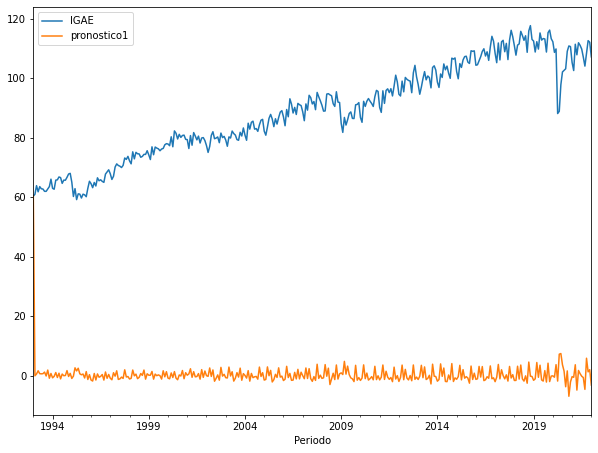

In [ ]:
serie[['IGAE', 'pronostico1']].plot()
plt.show()

**m) Pronostica para 5 meses, y para cada mes obtén su intervalo de confianza 
al 95%, y grafica ¿ qué ocurre con los intervalos de confianza cuando se 
pronostica más en el futuro?**

In [ ]:
len(serie)

349

In [ ]:
#Pronostico de los siguientes 5 meses
resultado2.predict(349, 353)

2022-03-01    4.797131
2022-04-01    0.599098
2022-05-01    4.223094
2022-06-01   -2.740750
2022-07-01   -3.433647
Freq: MS, Name: predicted_mean, dtype: float64

**n) Pronostica 30 meses en el futuro ¿Qué pasa con el pronóstico a partir del 
mes 12?**

In [ ]:
#Pronostico de los siguientes 30 meses 
resultado2.predict(349, 379)

2022-03-01    4.797131
2022-04-01    0.599098
2022-05-01    4.223094
2022-06-01   -2.740750
2022-07-01   -3.433647
2022-08-01    1.465160
2022-09-01   -0.488305
2022-10-01    5.380259
2022-11-01   -2.715235
2022-12-01   -1.100970
2023-01-01   -0.452258
2023-02-01   -0.640549
2023-03-01    4.834550
2023-04-01   -2.720147
2023-05-01    1.022359
2023-06-01   -2.011919
2023-07-01    0.056866
2023-08-01    3.423162
2023-09-01   -2.300038
2023-10-01    2.328748
2023-11-01   -3.114797
2023-12-01    1.192014
2024-01-01    1.559554
2024-02-01   -1.347782
2024-03-01    2.635892
2024-04-01   -3.553196
2024-05-01    2.268484
2024-06-01   -0.340286
2024-07-01    0.004147
2024-08-01    2.022933
2024-09-01   -3.219633
Freq: MS, Name: predicted_mean, dtype: float64